In [1]:
import sys, os
sys.path.append(os.path.dirname(os.getcwd()))
from db import helper as db_helper
from common import treat_data, extract_period_returns, extract_volatility_of_prices, reshape_df, extract_price_volatility
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
plt.figure(figsize=(16,8))
plt.style.use('seaborn-whitegrid')

<Figure size 1152x576 with 0 Axes>

In [2]:
session = db_helper.start_session()
df = pd.read_sql_table('spot_rates', session.bind)

2019-05-05 09:43:48,160 INFO sqlalchemy.engine.base.Engine select version()
2019-05-05 09:43:48,161 INFO sqlalchemy.engine.base.Engine {}
2019-05-05 09:43:48,164 INFO sqlalchemy.engine.base.Engine select current_schema()
2019-05-05 09:43:48,165 INFO sqlalchemy.engine.base.Engine {}
2019-05-05 09:43:48,168 INFO sqlalchemy.engine.base.Engine SELECT CAST('test plain returns' AS VARCHAR(60)) AS anon_1
2019-05-05 09:43:48,168 INFO sqlalchemy.engine.base.Engine {}
2019-05-05 09:43:48,171 INFO sqlalchemy.engine.base.Engine SELECT CAST('test unicode returns' AS VARCHAR(60)) AS anon_1
2019-05-05 09:43:48,172 INFO sqlalchemy.engine.base.Engine {}
2019-05-05 09:43:48,174 INFO sqlalchemy.engine.base.Engine show standard_conforming_strings
2019-05-05 09:43:48,174 INFO sqlalchemy.engine.base.Engine {}
2019-05-05 09:43:48,177 INFO sqlalchemy.engine.base.Engine SELECT c.relname FROM pg_class c JOIN pg_namespace n ON n.oid = c.relnamespace WHERE n.nspname = %(schema)s AND c.relkind = 'r'
2019-05-05 09:

2019-05-05 09:43:48,275 INFO sqlalchemy.engine.base.Engine {}


/anaconda3/lib/python3.6/site-packages/psycopg2/__init__.py:144: UserWarning: The psycopg2 wheel package will be renamed from release 2.8; in order to keep installing from binary please use "pip install psycopg2-binary" instead. For details see: <http://initd.org/psycopg/docs/install.html#binary-install-from-pypi>.
  """)


In [3]:
df.head()

,id,url,day,month,year,base_currency,target_currency,base_value,target_spot_rate,target_52wk_high,target_52wk_low,created_at,updated_at
0,1,https://www.bankofengland.co.uk/boeapps/databa...,31,5,2007,USD,Australian Dollar,1.0,1.2082,NaN,NaN,2018-12-26 21:40:45.758406,NaT
1,2,https://www.bankofengland.co.uk/boeapps/databa...,31,5,2007,USD,Canadian Dollar,1.0,1.0691,NaN,NaN,2018-12-26 21:40:45.774056,NaT
2,3,https://www.bankofengland.co.uk/boeapps/databa...,31,5,2007,USD,Chinese Yuan,1.0,7.6450,NaN,NaN,2018-12-26 21:40:45.783171,NaT
3,4,https://www.bankofengland.co.uk/boeapps/databa...,31,5,2007,USD,Cyprus Pound,1.0,0.4336,NaN,NaN,2018-12-26 21:40:45.788855,NaT
4,5,https://www.bankofengland.co.uk/boeapps/databa...,31,5,2007,USD,Czech Koruna,1.0,21.0323,NaN,NaN,2018-12-26 21:40:45.802340,NaT


In [4]:
df = treat_data(df)

In [5]:
df.head()

,date,year,month,week,day,base_currency,target_currency_symbol,target_spot_rate
0,2007-05-31,2007,5,22,31,USD,AUD,1.2082
1,2007-05-31,2007,5,22,31,USD,CAD,1.0691
2,2007-05-31,2007,5,22,31,USD,Yuan,7.6450
3,2007-05-31,2007,5,22,31,USD,CYP,0.4336
4,2007-05-31,2007,5,22,31,USD,CZK,21.0323


In [6]:
# Split DF by currency
gbp_df = df[(df['base_currency']=='GBP')]
usd_df = df[(df['base_currency']=='USD')]
eur_df = df[(df['base_currency']=='EUR')]

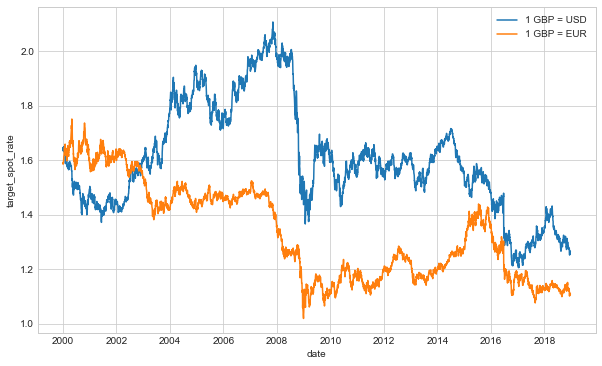

In [7]:
plt.figure(figsize=(10,6))
gbp_usd = gbp_df[gbp_df['target_currency_symbol']=='USD']
gbp_eur = gbp_df[gbp_df['target_currency_symbol']=='EUR']
gbp_jpy = gbp_df[gbp_df['target_currency_symbol']=='JPY']

ax = sns.lineplot(x='date', y='target_spot_rate', data=gbp_usd, label='1 GBP = USD')
ax = sns.lineplot(x='date', y='target_spot_rate', data=gbp_eur, label='1 GBP = EUR')
# ax = sns.lineplot(x='date', y='target_spot_rate', data=gbp_jpy, label='1 GBP = JPY')

plt.show()

In [8]:
# This looks like the actually spot rates observed on xe.com

In [9]:
df = extract_period_returns(gbp_df)

/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)
/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [10]:
df.head()

,date,target_spot_rate,one_day_future_return,one_week_future_return,one_month_future_return,one_year_future_return,one_day_past_price,one_week_past_price,one_month_past_price,one_year_past_price,one_day_past_return,one_week_past_return,one_month_past_return,one_year_past_return,target_currency_symbol,day,week,month,year
0,2001-02-12,2.6986,0.007967,0.011524,0.082376,0.042652,2.6998,2.6799,2.6556,2.5333,-0.000444,0.006978,0.016192,0.065251,AUD,12,7,2,2001
1,2001-02-13,2.7201,0.015110,0.016654,0.065292,0.019043,2.6986,2.6683,2.6556,2.5333,0.007967,0.019413,0.024288,0.073738,AUD,13,7,2,2001
2,2001-02-14,2.7612,0.002535,-0.006446,0.049435,0.003984,2.7201,2.6770,2.6556,2.5260,0.015110,0.031453,0.039765,0.093112,AUD,14,7,2,2001
3,2001-02-15,2.7682,-0.012752,-0.004118,0.046781,0.001445,2.7612,2.6911,2.6744,2.5351,0.002535,0.028650,0.035073,0.091949,AUD,15,7,2,2001
4,2001-02-16,2.7329,0.000000,0.015917,0.045593,0.014380,2.7682,2.6998,2.6442,2.5424,-0.012752,0.012260,0.033545,0.074929,AUD,16,7,2,2001


In [11]:
df = extract_price_volatility(df)

/Users/JaiPancholi/Sites/currency_analysis/notebooks/common.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  currency_df['weekly_spot_rate_volatility'] = currency_df.rolling('7D')['target_spot_rate'].std()
/Users/JaiPancholi/Sites/currency_analysis/notebooks/common.py:180: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  currency_df['monthly_spot_rate_volatility'] = currency_df.rolling('30D')['target_spot_rate'].std()
/Users/JaiPancholi/Sites/currency_analysis/notebooks/common.py:181: SettingWithCopyWarning: 
A value is trying to be set o

In [12]:
df.head()

,date,target_spot_rate,one_day_future_return,one_week_future_return,one_month_future_return,one_year_future_return,one_day_past_price,one_week_past_price,one_month_past_price,one_year_past_price,...,one_month_past_return,one_year_past_return,target_currency_symbol,day,week,month,year,weekly_spot_rate_volatility,monthly_spot_rate_volatility,yearly_spot_rate_volatility
0,2001-02-12,2.6986,0.007967,0.011524,0.082376,0.042652,2.6998,2.6799,2.6556,2.5333,...,0.016192,0.065251,AUD,12,7,2,2001,NaN,NaN,NaN
1,2001-02-13,2.7201,0.015110,0.016654,0.065292,0.019043,2.6986,2.6683,2.6556,2.5333,...,0.024288,0.073738,AUD,13,7,2,2001,0.015203,0.015203,0.015203
2,2001-02-14,2.7612,0.002535,-0.006446,0.049435,0.003984,2.7201,2.6770,2.6556,2.5260,...,0.039765,0.093112,AUD,14,7,2,2001,0.031807,0.031807,0.031807
3,2001-02-15,2.7682,-0.012752,-0.004118,0.046781,0.001445,2.7612,2.6911,2.6744,2.5351,...,0.035073,0.091949,AUD,15,7,2,2001,0.033263,0.033263,0.033263
4,2001-02-16,2.7329,0.000000,0.015917,0.045593,0.014380,2.7682,2.6998,2.6442,2.5424,...,0.033545,0.074929,AUD,16,7,2,2001,0.028865,0.028865,0.028865


In [13]:
# cols = ['target_spot_rate', 'weekly_spot_rate_volatility', 'monthly_spot_rate_volatility', 'yearly_spot_rate_volatility', 'one_day_future_return', 'one_week_future_return', 'one_month_future_return', 'one_year_future_return', 'one_day_past_return', 'one_week_past_return', 'one_month_past_return', 'one_year_past_return']
    
# test_df = df[['date']].drop_duplicates()
# target_currencies = ['AUD', 'USD']
# for cur in target_currencies:
#     temp_df = df[df['target_currency_symbol']==cur][['date']+cols]
#     temp_df = temp_df.reset_index().rename({col: cur+'_'+col for col in cols}, axis=1)
#     temp_df.drop(columns=['index'], inplace=True, axis=1)
#     test_df = test_df.merge(temp_df, how='left', on=['date'])
    
# test_df

In [14]:
df = reshape_df(df)

In [ ]:
cols = ['target_spot_rate', 'weekly_spot_rate_volatility', 'monthly_spot_rate_volatility', 'yearly_spot_rate_volatility', 'one_day_future_return', 'one_week_future_return', 'one_month_future_return', 'one_year_future_return', 'one_day_past_return', 'one_week_past_return', 'one_month_past_return', 'one_year_past_return']
for col in cols:
    print(col.strip())

In [15]:
df.head()

,date,AUD_target_spot_rate,AUD_weekly_spot_rate_volatility,AUD_monthly_spot_rate_volatility,AUD_yearly_spot_rate_volatility,AUD_one_day_future_return,AUD_one_week_future_return,AUD_one_month_future_return,AUD_one_year_future_return,AUD_one_day_past_return,...,JPY_monthly_spot_rate_volatility,JPY_yearly_spot_rate_volatility,JPY_one_day_future_return,JPY_one_week_future_return,JPY_one_month_future_return,JPY_one_year_future_return,JPY_one_day_past_return,JPY_one_week_past_return,JPY_one_month_past_return,JPY_one_year_past_return
0,2001-02-12,2.6986,NaN,NaN,NaN,0.007967,0.011524,0.082376,0.042652,-0.000444,...,NaN,NaN,-0.002486,-0.018232,0.029666,0.115228,0.004008,0.007746,-0.019621,-0.016524
1,2001-02-13,2.7201,0.015203,0.015203,0.015203,0.015110,0.016654,0.065292,0.019043,0.007967,...,0.300238,0.300238,-0.001487,-0.020538,0.031183,0.109416,-0.002486,0.014634,-0.022058,-0.018969
2,2001-02-14,2.7612,0.031807,0.031807,0.031807,0.002535,-0.006446,0.049435,0.003984,0.015110,...,0.342538,0.342538,-0.014430,-0.010136,0.032718,0.117021,-0.001487,0.003164,-0.023512,-0.014728
3,2001-02-15,2.7682,0.033263,0.033263,0.033263,-0.012752,-0.004118,0.046781,0.001445,0.002535,...,1.410849,1.410849,-0.000469,0.003810,0.047838,0.133376,-0.014430,-0.000813,-0.045898,-0.034240
4,2001-02-16,2.7329,0.028865,0.028865,0.028865,0.000000,0.015917,0.045593,0.014380,-0.012752,...,1.555585,1.555585,0.000000,0.005981,0.039486,0.133908,-0.000469,-0.014869,-0.031543,-0.044358


In [16]:
df.shape

(6117, 61)

Text(0.5,1,'Correlation Plot')

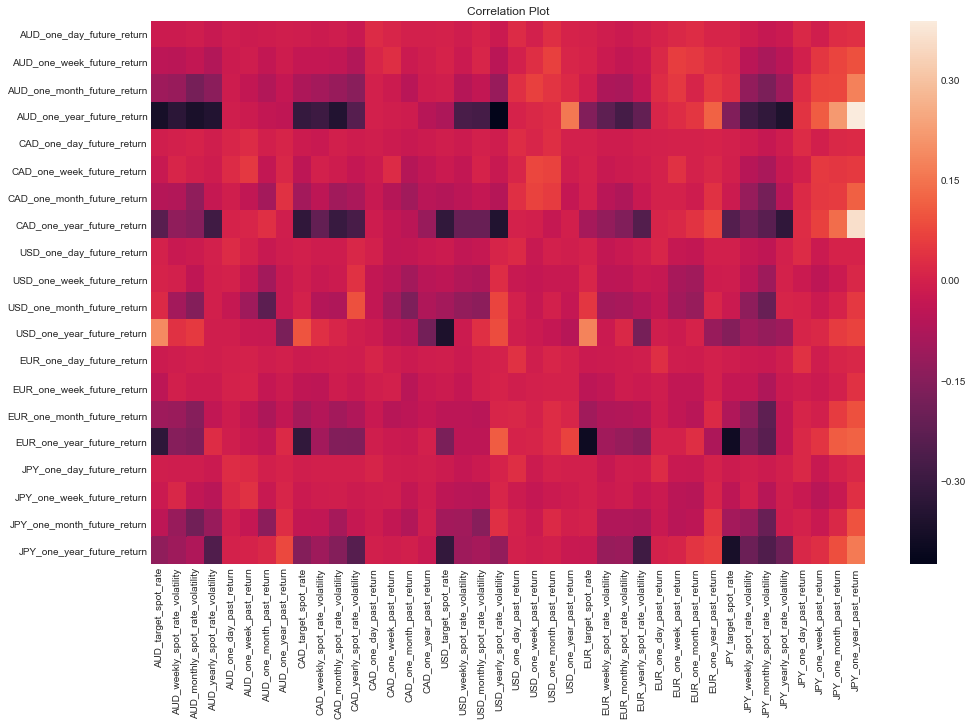

In [17]:
return_cols = [c for c in df.columns if c.endswith('future_return')]
non_return_cols = [c for c in df.columns if not c.endswith('future_return')]
non_return_cols.remove('date')

correlation_df = df.corr()
correlation_df = correlation_df.drop(index=non_return_cols)
correlation_df = correlation_df.drop(columns=return_cols)

plt.figure(figsize=(16, 10))
ax = sns.heatmap(correlation_df)
ax.set_title('Correlation Plot')

Text(0.5,1,'Example of Negatively Correlated Features')

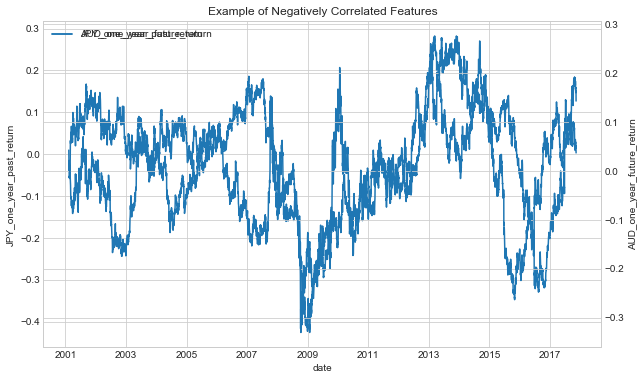

In [19]:
plt.figure(figsize=(10,6))
ax = sns.lineplot(x='date', y='JPY_one_year_past_return', data=df, label='JPY_one_year_past_return')
ax2 = ax.twinx()
ax_2 = sns.lineplot(x='date', y='AUD_one_year_future_return', data=df, label='AUD_one_year_future_return', ax=ax2)
ax.set_title('Example of Negatively Correlated Features')

# plt.show()

Text(0.5,1,'Example of Non-Correlated Features')

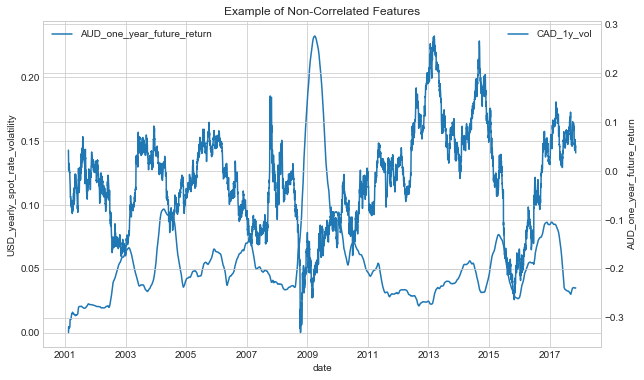

In [21]:
plt.figure(figsize=(10,6))
ax = sns.lineplot(x='date', y='USD_yearly_spot_rate_volatility', data=df, label='CAD_1y_vol')
ax2 = ax.twinx()
ax_2 = sns.lineplot(x='date', y='AUD_one_year_future_return', data=df, label='AUD_one_year_future_return', ax=ax2)
ax.set_title('Example of Non-Correlated Features')


In [ ]:
plt.figure(figsize=(10,6))
ax = sns.lineplot(x='date', y='CAD_1y_vol', data=df, label='CAD_1y_vol')
ax2 = ax.twinx()
ax_2 = sns.lineplot(x='date', y='EUR_target_spot_rate', data=df, label='EUR_target_spot_rate', ax=ax2)
ax.set_title('Example of Positively Correlated Features')

In [ ]:
plt.figure(figsize=(10,6))
ax = sns.lineplot(x='date', y='CAD_1y_vol', data=df, label='CAD_1y_vol')
ax2 = ax.twinx()
ax_2 = sns.lineplot(x='date', y='EUR_target_spot_rate', data=df, label='EUR_target_spot_rate', ax=ax2)
ax.set_title('Example of Positively Correlated Features')